# K-means Algorithm


Data clustering is one of the main mathematical applications variety of algorithms have been developed to tackle the problem. K-means is one of the basic algorithms for data clustering.

## Prerequisites

The reader should be familiar with basic linear algebra. 
 
## Competences 

The reader should be able to recognise applications where K-means algorithm can be efficiently used and use it.

_Credits._ The notebook is based on [I. Mirošević, Spectral Graph Partitioning and Application to Knowledge Extraction][Mir05].

[Mir05]: #1 "I. Mirošević, 'Spectral Graph Partitioning and Application to Knowledge Extraction', M.Sc. Thesis, Iniversity of Zagreb, 2005 (in Croatian)." 

## Definitions

_Data clustering problem_ is the following: partition the given set of $m$ objects of the same type into $k$ subsets according to some criterion. Additional request may be to find the optimal $k$.

_K-means clustering problem_ is the following: 
partition the set  $X=\{x_{1},x_{2},\cdots ,x_{m}\}$ , where $x_{i}\in\mathbb{R}^{n}$, into $k$ _clusters_ $\pi=\{C_{1},C_{2},...,C_{k}\}$ such that
$$
J(\pi)=\sum_{i=1}^{k}\sum_{x\in
C_{i}}\| x-c_{i}\|_{2}^{2} \to \min
$$
over all possible partitions. Here
$c_{i}=\displaystyle\frac{1}{|C_{i}|}\sum_{x\in C_{i}} x$ is the mean of points in $C_i$ and $|C_i|$ is the cardinality of $C_i$.

_K-means clustering algorithm_ is the following:
1. _Initialization_: Choose initial set of $k$ means $\{c_1,\ldots,c_k\}$ (for example, by choosing randomly $k$ points from $X$).
2. _Assignment step_: Assign each point $x$ to one nearest mean $c_i$.
3. _Update step_: Compute the new means.
4. _Convergence_: Repeat Steps 2 and 3 until the assignment no longer changes.

A _first variation_ of a partition $\pi=\{C_1,\ldots,C_k\}$ is 
a partition $\pi^{\prime}=\{C_{1}^{\prime},\cdots ,C_{k}^{\prime }\}$ 
obtained by moving a single point $x$ from a cluster  $C_{i}$ to a cluster $C_{j}$. Notice that $\pi$ is a first variation of itself.

A _next partition_ of the partition $\pi$ is a partition 
$\mathop{\mathrm{next}}(\pi)=\mathop{\mathrm{arg min}}\limits_{\pi^{\prime}} J(\pi^{\prime})$.

_First Variation clustering algorithm_ is the following:
1. Choose initial partition $\pi$.
2. Compute $\mathop{\mathrm{next}}(\pi)$
3. If $J(\mathop{\mathrm{next}}(\pi))<J(\pi)$, set $\pi=\mathop{\mathrm{next}}(\pi)$ and go to Step 2
4. Stop.

## Facts

1. The k-means clustering problem is NP-hard.

2. In the k-means algorithm, $J(\pi)$ decreases in every iteration.

3. K-means algorithm can converge to a local minimum.

4. Each iteration of the k-means algorithm requires $O(mnk)$ operations.

4. K-means algorithm is implemented in the function `kmeans()` in the package [Clustering.jl](https://github.com/JuliaStats/Clustering.jl).

5. $J(\pi)=\mathop{\mathrm{trace}}(S_W)$, where
$$
S_{W}=\sum\limits_{i=1}^k\sum\limits_{x\in C_{i}}
(x-c_i)(x-c_{i})^{T}
=\sum_{i=1}^k\frac{1}{2|C_{i}|}\sum_{x\in C_{i}}\sum_{y \in C_{i}}
(x-y)(x-y)^{T}.
$$
Let $c$ denote the mean of $X$. Then $S_W=S_T-S_B$, where
\begin{align*}
S_{T}&=\sum_{x\in X}(x-c)(x-c)^{T} = 
\frac{1}{2m}\sum_{i=1}^m\sum_{j=1}^m
(x_{i}-x_{j})(x_{i}-x_{j})^{T}, \\
S_{B}&=\sum_{i=1}^k|C_{i}|(c_{i}-c)(c_{i}-c)^{T} =
\frac{1}{2m}\sum_{i=1}^k\sum_{j=1}^k|C_{i}||C_{j}|
(c_{i}-c_{j})(c_{i}-c_{j})^{T}.
\end{align*}

6. In order to try to avoid convergence to local minima, the k-means algorithm can be enhanced with first variation by adding the following steps:
    1. Compute $\mathop{\mathrm{next}}(\pi)$. 
    2. If $J(\mathop{\mathrm{next}}(\pi))<J(\pi)$, set $\pi=\mathop{\mathrm{next}}(\pi)$ and go to Step 2.
     

In [1]:
using LinearAlgebra
using Random
using Statistics

In [2]:
function myKmeans(X::Array{T}, k::Int64) where T
    # X is Array of Arrays
    m,n=length(X),length(X[1])
    C=Array{Int64}(undef,m)
    # Choose random k means among X
    c=X[randperm(m)[1:k]]
    # This is just to start the while loop
    cnew=copy(c)
    cnew[1]=zeros(size(c[1])) # cnew[1].+[1.0;1.0]
    # Loop
    iterations=0
    while cnew!=c
        iterations+=1
        cnew=copy(c)
        # Assignment
        for i=1:m
            C[i]=findmin([norm(X[i]-c[j]) for j=1:k])[2]
        end
        # Update
        for j=1:k
            c[j]=mean(X[C.==j])
        end
    end
    C,c,iterations
end

myKmeans (generic function with 1 method)

### Example - Random clusters

We generate $k$ random clusters around points with integer coordinates.

In [3]:
using Plots

In [5]:
# Generate points
import Random
Random.seed!(362)
k=5
centers=rand(-5:5,k,2)
# Number of points in cluster
sizes=rand(10:50,k)
# X is array of arrays
X=Array{Array{Any}}(undef,sum(sizes))
first=0
last=0
for j=1:k
    first=last+1
    last=last+sizes[j]
    for i=first:last
        X[i]=map(Float64,vec(centers[j,:])+(rand(2) .-0.5)/2)
    end
end
centers

5×2 Array{Int64,2}:
  2   2
  3   5
 -3  -2
  5  -5
 -5  -5

In [6]:
sizes

5-element Array{Int64,1}:
 35
 49
 16
 37
 32

In [7]:
# Prepare for plot
function extractxy(X::Array)
    x=map(Float64,[X[i][1] for i=1:length(X)])
    y=map(Float64,[X[i][2] for i=1:length(X)])
    x,y
end
x,y=extractxy(X)

([2.0557686100193893, 1.9908933908006647, 1.8679991964751022, 1.7909545126982973, 1.9238759884975893, 2.139054117980214, 2.0080335398302673, 2.109837714529047, 1.9570671936120567, 1.8232137825139845  …  -4.916329601316085, -5.082550521104293, -4.808599654088285, -5.122020575671452, -5.120098593712975, -4.7704692696525655, -4.980615131833654, -4.769987907332003, -5.091269566530532, -4.951383965360243], [1.7655473728406748, 1.851695826852366, 2.0321116704639013, 2.097862800370225, 2.234321735978327, 2.1407399831129776, 2.2217326284786765, 1.7873314945363572, 2.113180781545575, 1.9119174727302883  …  -5.1392798760476595, -5.106916324629353, -5.220688854962412, -5.045331412186495, -4.841637770041434, -4.910029678986632, -5.121886844453032, -4.803582372147337, -5.072572933257838, -5.003126265442419])

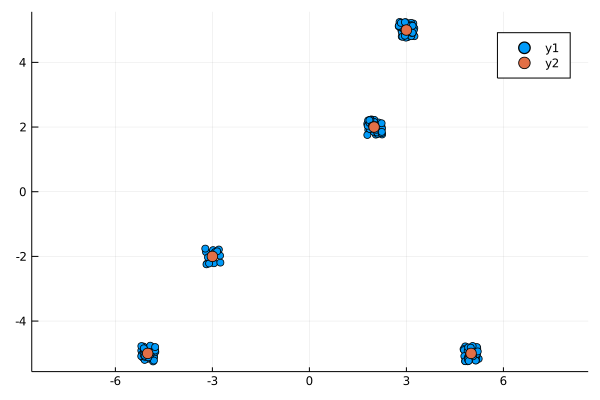

In [8]:
scatter(x,y)
scatter!(centers[:,1],centers[:,2],markersize=6, aspect_ratio=:equal)

In [9]:
# Cluster the data, repeat several times
C,c,iterations=myKmeans(X,k)

([2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  4, 4, 4, 4, 4, 4, 4, 4, 4, 4], Array{Any,N} where N[[-2.9242907670235665, -1.8983505316212186], [2.5988945660592058, 3.756074359662221], [-3.1058542930281083, -2.185377227632883], [-5.006804555980178, -4.995028221755187], [4.997235352999282, -5.012077600245369]], 2)

In [10]:
print(C)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

In [11]:
# Plot the solution
function plotKmeansresult(C::Array,c::Array,X::Array)
    x,y=extractxy(X)
    cx,cy=extractxy(c)
    # Clusters
    scatter(x[findall(C.==1)],y[findall(C.==1)])
    for j=2:k
        scatter!(x[findall(C.==j)],y[findall(C.==j)])
    end
    # Centers
    scatter!(cx,cy,markercolor=:black)
end

plotKmeansresult (generic function with 1 method)

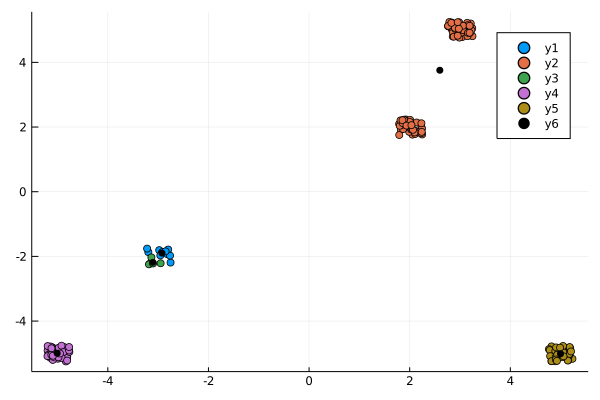

In [12]:
plotKmeansresult(C,c,X)

__What happens?__

We see that the algorithm, although simple, for this example 
may converge to a local minimum.

Let us try the function `kmeans()` from the package `Clustering.jl`.
In this function, the input is a matrix where columns are points, number of cluster we are looking for, and, optionally, the method to compute initial means. 

If we choose `init=:rand`, the results are similar. If we choose
`init=:kmpp`, which is the default, the results are better, but convergence to a local minimum is still possible.

_Run the clustering several times!_

```
seeding_algorithm(s::Symbol) = 
    s == :rand ? RandSeedAlg() :
    s == :kmpp ? KmppAlg() :
    s == :kmcen ? KmCentralityAlg() :
    error("Unknown seeding algorithm $s")
```

In [13]:
using Clustering

In [14]:
?kmeans

search: kmeans kmeans! kmeans_opts KmeansResult myKmeans plotKmeansresult



```
kmeans(X, k, [...]) -> KmeansResult
```

K-means clustering of the $d×n$ data matrix `X` (each column of `X` is a $d$-dimensional data point) into `k` clusters.

# Arguments

  * `init` (defaults to `:kmpp`): how cluster seeds should be initialized, could be one of the following:

      * a `Symbol`, the name of a seeding algorithm (see [Seeding](@ref) for a list of supported methods);
      * an instance of [`SeedingAlgorithm`](@ref);
      * an integer vector of length $k$ that provides the indices of points to use as initial seeds.
  * `weights`: $n$-element vector of point weights (the cluster centers are the weighted means of cluster members)
  * `maxiter`, `tol`, `display`: see [common options](@ref common_options)


In [15]:
methods(kmeans)

# 1 method for generic function "kmeans":
[1] kmeans(X::AbstractArray{#s32,2} where #s32<:Real, k::Integer; weights, init, maxiter, tol, display, distance) in Clustering at C:\Users\Ivan_Slapnicar\.julia\packages\Clustering\dzWhx\src\kmeans.jl:103

In [16]:
X1=Matrix(transpose([x y]))
out=kmeans(X1,k,init=:kmpp)

KmeansResult{Array{Float64,2},Float64,Int64}([3.026142638664701 4.997235352999282 … 2.0007472644115136 -2.981029368899985; 5.0078571343598615 -5.012077600245369 … 2.003578475085524 -1.9880463741248637], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [0.05968615410839817, 0.02316543765945589, 0.018436192779352822, 0.052902532665795476, 0.059151645508077166, 0.03794206502844233, 0.04764432445216116, 0.058663482903478226, 0.013920614166408996, 0.039919876547426014  …  0.028994257187591188, 0.018256398797376505, 0.09020790451346272, 0.015805142161070762, 0.036364169662761014, 0.06307911983633119, 0.016778996089911402, 0.0927336384090296, 0.013147520289308545, 0.0031370201762257466], [49, 37, 32, 35, 16], [49, 37, 32, 35, 16], 7.347735411356952, 2, true)

In [17]:
X1

2×169 Array{Float64,2}:
 2.05577  1.99089  1.868    1.79095  1.92388  …  -4.76999  -5.09127  -4.95138
 1.76555  1.8517   2.03211  2.09786  2.23432     -4.80358  -5.07257  -5.00313

In [18]:
fieldnames(KmeansResult)

(:centers, :assignments, :costs, :counts, :wcounts, :totalcost, :iterations, :converged)

In [19]:
out.centers

2×5 Array{Float64,2}:
 3.02614   4.99724  -5.0068   2.00075  -2.98103
 5.00786  -5.01208  -4.99503  2.00358  -1.98805

In [20]:
println(out.assignments)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [21]:
# We need to modify the plotting function
function plotKmeansresult(out::KmeansResult,X::Array)
    k=size(out.centers,2)
    # Clusters
    scatter(X[1,findall(out.assignments.==1)],X[2,findall(out.assignments.==1)])
    for j=2:k
        scatter!(X[1,findall(out.assignments.==j)],X[2,findall(out.assignments.==j)])
    end
    # Centers
    scatter!(out.centers[1,:],out.centers[2,:],markercolor=:black,aspect_ratio=:equal)
end

plotKmeansresult (generic function with 2 methods)

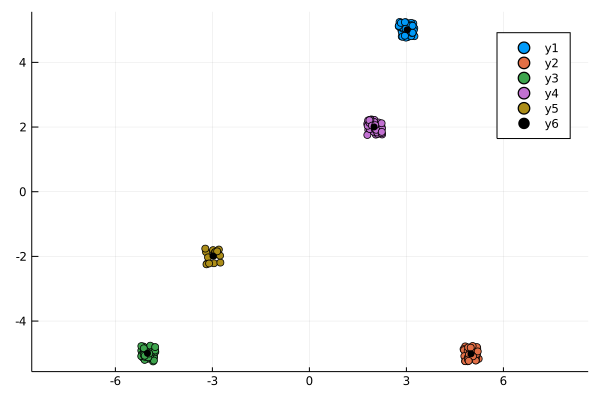

In [22]:
plotKmeansresult(out,X1)

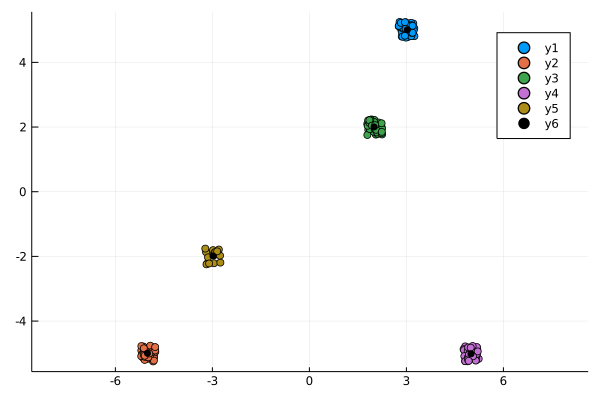

In [23]:
out=kmeans(X1,k,init=:kmpp)
plotKmeansresult(out,X1)

### Example - Concentric rings

The k-means algorithm works well if clusters can be separated by hyperplanes. In this example it is not the case.

In [24]:
# Number of rings, try also k=3
k=2
# Center
center=[rand(-5:5);rand(-5:5)]
# Radii
radii=randperm(10)[1:k]
# Number of points in circles
sizes=rand(1000:2000,k)
center,radii,sizes

([4, 2], [10, 3], [1188, 1997])

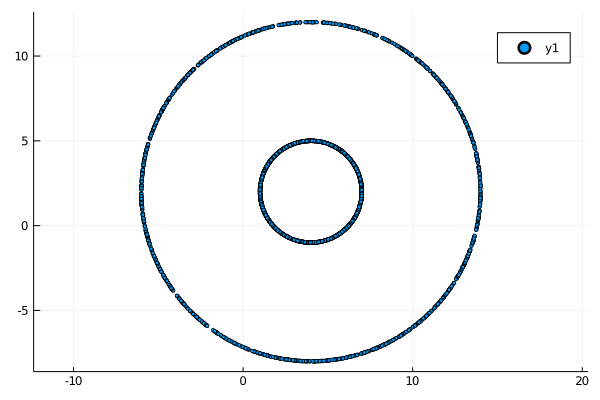

In [25]:
# Points
X=Array{Float64}(undef,2,sum(sizes))
first=0
last=0
for j=1:k
    first=last+1
    last=last+sizes[j]
    # Random angles
    ϕ=2*π*rand(sizes[j])
    for i=first:last
        l=i-first+1
        X[:,i]=center+radii[j]*[cos(ϕ[l]);sin(ϕ[l])]+(rand(2).-0.5)/50
    end
end
scatter(X[1,:],X[2,:],markersize=2,aspect_ratio=:equal)

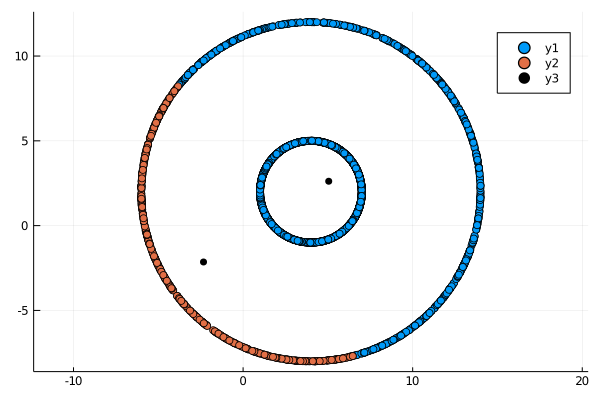

In [26]:
out=kmeans(X,k)
plotKmeansresult(out,X)